## Explore MVP:

#### This notebook addresses the following:


- What is the relationsheep between tag and target?
- Are there any sources that have change in sentiment based on president tag?
- What is the relationship of the top 3 occuring tags (excluding president names) and article sentiment by individual news sources?



In [1]:
import pandas as pd
import numpy as np
import helper
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt
import re
import datetime

from scipy import stats
from scipy.stats import pearsonr, spearmanr

from googletrans import Translator

data = pd.read_csv('daily8_5.csv')
data['dateline'] = pd.to_datetime(data.dateline)
df = data.copy()
df = df[df.text_label != 'False']
df2 = df

In [31]:
data = pd.read_csv('daily8_5.csv')
#import data with sentiment analysis

In [32]:
data.info()
#snapshot of df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331870 entries, 0 to 331869
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           331870 non-null  int64  
 1   id              331870 non-null  object 
 2   url             331870 non-null  object 
 3   headline        331870 non-null  object 
 4   dateline        331870 non-null  object 
 5   text            331870 non-null  object 
 6   tags            331870 non-null  object 
 7   source          331870 non-null  object 
 8   text_label      331870 non-null  object 
 9   text_score      331870 non-null  object 
 10  headline_label  331870 non-null  object 
 11  headline_score  331870 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 30.4+ MB


In [33]:
data['dateline'] = pd.to_datetime(data.dateline)
#convert data type 

In [34]:
df = data.copy()
#make df copy for easy reference

In [35]:
df = df[df.text_label != 'False']

In [36]:
df2 = df

## Explore Question 1: What is the relationship between tag and target?

In [6]:
df.tags.nunique()
#see how many values

707

In [7]:
topics = {'America' : 'أمريكا',
            'American' : 'أمريكيّ',
            'American (f)' : 'أمريكيّة',
            'American (pl)' : 'أمريكيّين',
            'The United States' : 'الولايات المتحدة',
            'The United States' : 'دول موحّدة',
            'Washington' : 'واشنطن',
            'Bush' : 'بوش',
            'Obama' : 'أوباما',
            'Cheney' : 'تشيني',
            'Clinton' : 'كلينتون',
            'Osama Bin Laden' : 'أسامة بن لادن',
            'Al Gore' : 'آل غور',
            'World Trade Center' : 'مركز التجارة العالمي',
            '9/11' : '9/11',
            'September 11' : '11 سبتمبر',
            'Gulf War' : 'حرب الخليج',
            'Google' : 'غوغل',
            'Facebook' : 'فيسبوك',
            'Al Qaida' : 'القاعدة'}

def flip_key_value_pairs(dicts):
    
    res = dict((v,k) for k,v in dicts.items())    
    return res


def make_eng_tags(df_tags):
    eng_tags =[]
    
    rev_topics = flip_key_value_pairs(topics)
    for key, value in rev_topics.items():
        if key in df_tags:
            eng_tags.append(value)
            
    return eng_tags

df['english_tags'] = df.tags.apply(make_eng_tags)
#translates tags to english

In [53]:
tag_count = dict(df['tags'].value_counts())
df['tag_count'] = df['tags']
df['tag_count'] = df['tag_count'].map(tag_count)

next_10= df[df.tag_count > 1300]
next_10= next_10[next_10.tag_count < 3200]
top_10= df[df.tag_count > 3200]

#only the top 20 tags

In [54]:
next_10['en_tags'] = next_10['english_tags'].apply(lambda x: ','.join(map(str, x)))
top_10['en_tags'] = top_10['english_tags'].apply(lambda x: ','.join(map(str, x)))
df['en_tags'] = df['english_tags'].apply(lambda x: ','.join(map(str, x)))
#change format

/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_89802/198600932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10['en_tags'] = top_10['english_tags'].apply(lambda x: ','.join(map(str, x)))


In [55]:
top_10['en_tags'].unique()
#english tags

array(['Al Qaida', 'Clinton', 'Washington', 'Bush', 'Washington,Bush',
       'America', 'Washington,Al Qaida', 'Washington,Obama', 'Obama',
       'Facebook'], dtype=object)

In [56]:
next_10['en_tags'].unique()
#english tags

array(['Obama,Clinton', 'Osama Bin Laden,Al Qaida', 'September 11',
       'Google', 'Washington,Clinton', 'Gulf War', '9/11',
       'America,Washington', 'America,Obama', 'America,Bush'],
      dtype=object)

In [57]:
next_10 = next_10[next_10.text_label != 'False']
next_perc = pd.crosstab(next_10.en_tags, next_10.text_label, margins=True)
next_perc = next_perc.apply(lambda x: x / x['All'] * 100, axis=1)
next_perc = next_perc.drop(columns=['All'])

top_10 = top_10[top_10.text_label != 'False']
top_perc = pd.crosstab(top_10.en_tags, top_10.text_label, margins=True)
top_perc = top_perc.apply(lambda x: x / x['All'] * 100, axis=1)
top_perc = top_perc.drop(columns=['All'])

### Ouestion 1 Visuals:

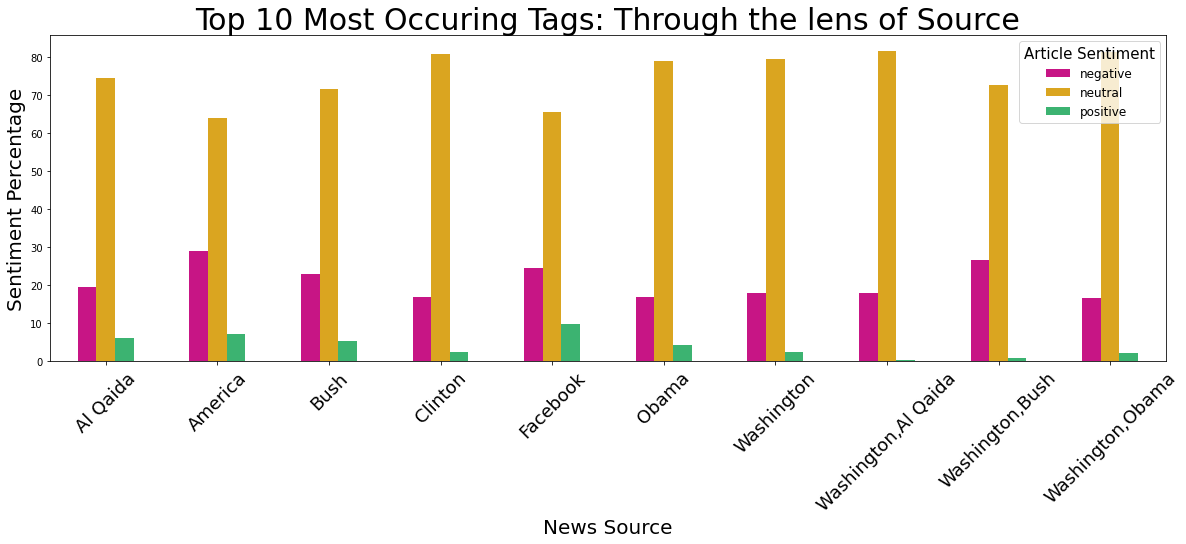

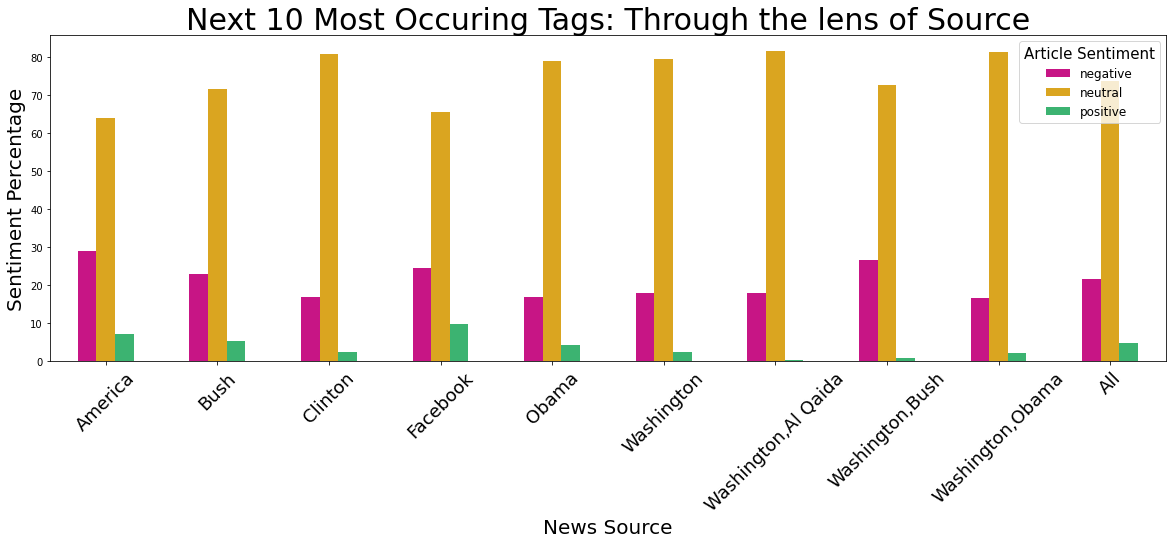

In [63]:
plt.rcParams["figure.figsize"] = (20, 6)

ax1= top_perc.head(10).plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])
ax2= top_perc.tail(10).plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])

ax1.set_xlabel("News Source", fontsize=20)
ax2.set_xlabel("News Source", fontsize=20)

ax1.set_ylabel("Sentiment Percentage", fontsize=20)
ax2.set_ylabel("Sentiment Percentage", fontsize=20)

xlabels = ax1.get_xticklabels() 
ax1.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax2.get_xticklabels() 
ax2.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)

ax1.set_title('Top 10 Most Occuring Tags: Through the lens of Source', size=30)
ax1.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax2.set_title('Next 10 Most Occuring Tags: Through the lens of Source', size=30)
ax2.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

plt.show()


### Ouestion 1 Statistical Tests:

### Ouestion 1 Statistical Tests:

- H0: The top 10 most frequently occuring tags and and text_label (sentiment) are independent of one another
- H1:  The top 10 most frequently occuring tags and and text_label (sentiment) are have a relationship

In [40]:
alpha =.05
#set alpha
observed = pd.crosstab(top_10.en_tags, top_10.text_label)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Reject the null hypothesis.


Statistical Test

- H0: The next 10 most frequently occuring tags and and text_label (sentiment) are independent of one another
- H1:  The next 10 most frequently occuring tags and and text_label (sentiment) are have a relationship

In [42]:
alpha =.05

observed = pd.crosstab(next_10.en_tags, next_10.text_label)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Reject the null hypothesis.


### Question 1 Takeaways:
What is the relationship between most frequently occuring tags and sentiment(target)?
   -   Looking at the top 20 most frequently occuring tags, a few items stick out. The tags Al Queda, Washington, and America are the 3 highest occuring outside of president names. Interestingly, America has the highest negativity rate amongst these 3 tags. Washington and Al Queda overall sentiments are closely matched. The tag of America,Washington together has the highest negativity occurances out of the top 20 tags. The highest positive rate in the top 20 tags is seen in the tag 'Facebook'. These findings lead to further exploration in the next 2 questions.

## Ouestion 2: Are there any sources that have change in sentiment based on president tag?

In [17]:
bush = df[(df['en_tags'] == 'Bush')]
obama = df[(df['en_tags'] == 'Obama')]
clinton = df[(df['en_tags'] == 'Clinton')]

presidents = pd.concat([bush, obama, clinton])
#dfs for presidents

pres_perc = pd.crosstab(presidents.source, presidents.text_label, margins=True)
pres_perc = pres_perc.apply(lambda x: x / x['All'] * 100, axis=1)
pres_perc = pres_perc.drop(columns=['All'])

clinton_perc = pd.crosstab(clinton.source, clinton.text_label, margins=True)
clinton_perc = clinton_perc.apply(lambda x: x / x['All'] * 100, axis=1)
clinton_perc = clinton_perc.drop(columns=['All'])

bush_perc = pd.crosstab(bush.source, bush.text_label, margins=True)
bush_perc = bush_perc.apply(lambda x: x / x['All'] * 100, axis=1)
bush_perc = bush_perc.drop(columns=['All'])

obama_perc = pd.crosstab(obama.source, obama.text_label, margins=True)
obama_perc = obama_perc.apply(lambda x: x / x['All'] * 100, axis=1)
obama_perc = obama_perc.drop(columns=['All'])

plt.rcParams["figure.figsize"] = (20, 6)

ax1= pres_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])
ax2= clinton_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])
ax3= bush_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])
ax4= obama_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])

ax1.set_xlabel("News Source", fontsize=20)
ax2.set_xlabel("News Source", fontsize=20)
ax3.set_xlabel("News Source", fontsize=20)
ax4.set_xlabel("News Source", fontsize=20)

ax1.set_ylabel("Sentiment Percentage", fontsize=20)
ax2.set_ylabel("Sentiment Percentage", fontsize=20)
ax3.set_ylabel("Sentiment Percentage", fontsize=20)
ax4.set_ylabel("Sentiment Percentage", fontsize=20)


xlabels = ax1.get_xticklabels() 
ax1.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax2.get_xticklabels() 
ax2.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax3.get_xticklabels() 
ax3.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax4.get_xticklabels() 
ax4.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)


ax1.set_title('Average Sentiments of All 3 President Tags', size=30)
ax1.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax2.set_title('Tag: President Clinton & Sentiment per Source', size=30)
ax2.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax3.set_title('Tag: President Bush & Sentiment per Source', size=30)
ax3.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax4.set_title('Tag: President Obama & Sentiment per Source', size=30)
ax4.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)


plt.show()


In [18]:
bush = df[(df['text_label'] != 'False')]
obama = df[(df['text_label'] != 'False')]
clinton = df[(df['text_label'] != 'False')]

In [19]:
bush.text_label.value_counts(normalize = True)
#percentage of sentiment

neutral     0.725871
negative    0.229064
positive    0.045064
Name: text_label, dtype: float64

In [20]:
obama.text_label.value_counts(normalize = True)
#percentage of sentiment

neutral     0.725871
negative    0.229064
positive    0.045064
Name: text_label, dtype: float64

In [21]:
clinton.text_label.value_counts(normalize = True)
#percentage of sentiment

neutral     0.725871
negative    0.229064
positive    0.045064
Name: text_label, dtype: float64

In [22]:
pres_perc = pd.crosstab(presidents.source, presidents.text_label, margins=True)
pres_perc = pres_perc.apply(lambda x: x / x['All'] * 100, axis=1)
pres_perc = pres_perc.drop(columns=['All'])

clinton_perc = pd.crosstab(clinton.source, clinton.text_label, margins=True)
clinton_perc = clinton_perc.apply(lambda x: x / x['All'] * 100, axis=1)
clinton_perc = clinton_perc.drop(columns=['All'])

bush_perc = pd.crosstab(bush.source, bush.text_label, margins=True)
bush_perc = bush_perc.apply(lambda x: x / x['All'] * 100, axis=1)
bush_perc = bush_perc.drop(columns=['All'])

obama_perc = pd.crosstab(obama.source, obama.text_label, margins=True)
obama_perc = obama_perc.apply(lambda x: x / x['All'] * 100, axis=1)
obama_perc = obama_perc.drop(columns=['All'])

### Ouestion 2 Visuals:

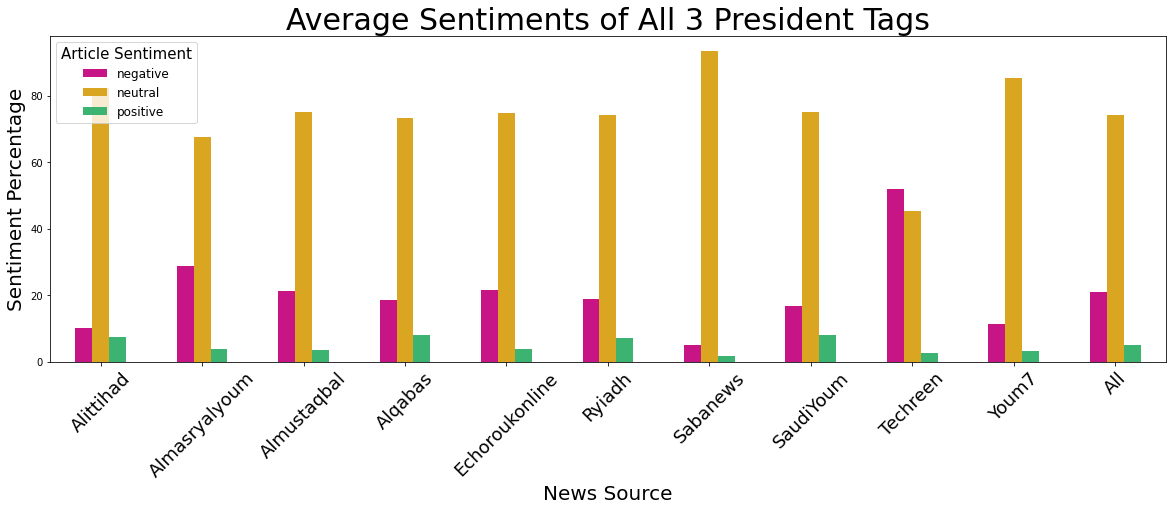

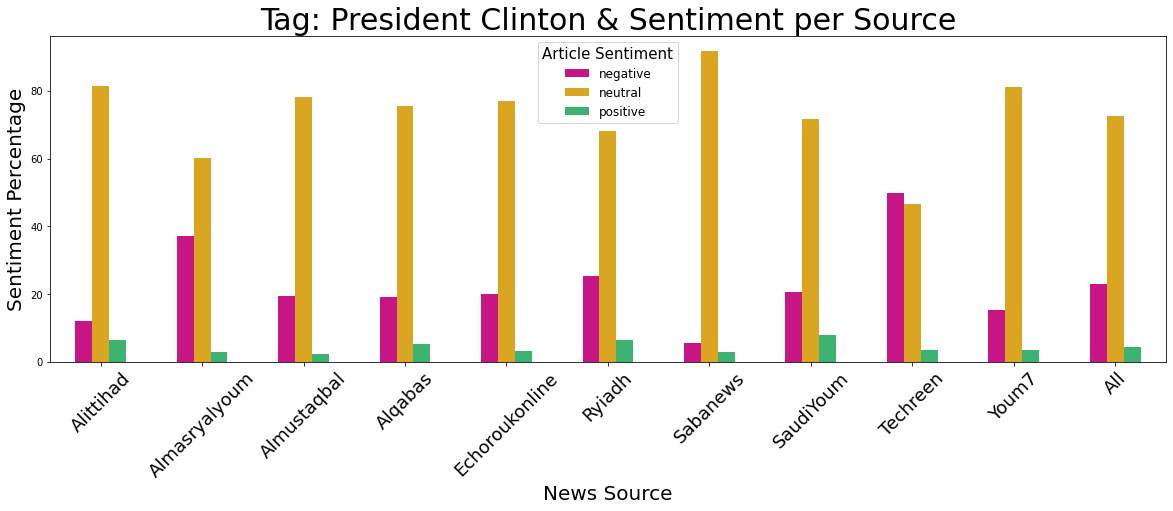

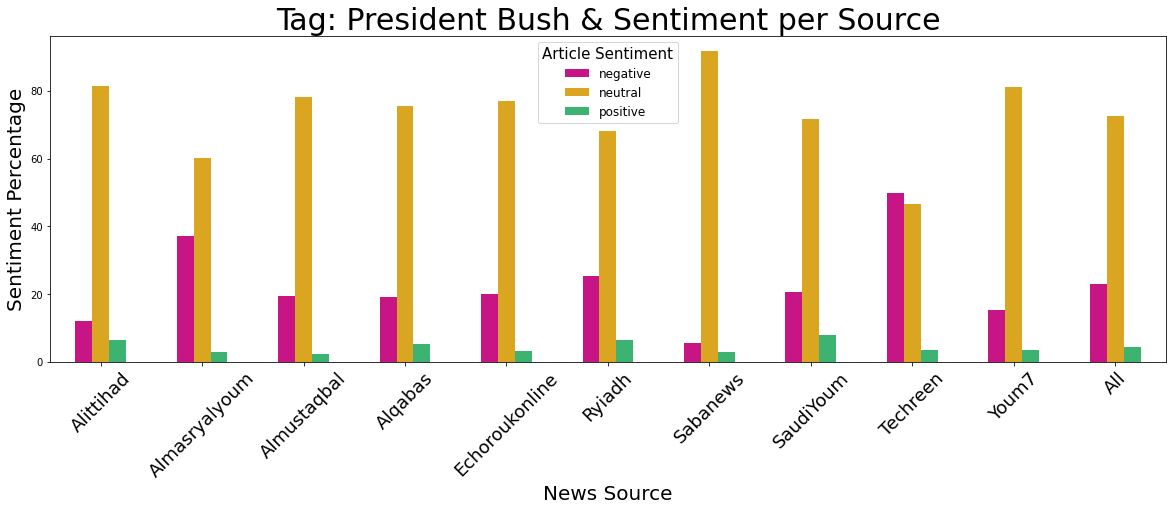

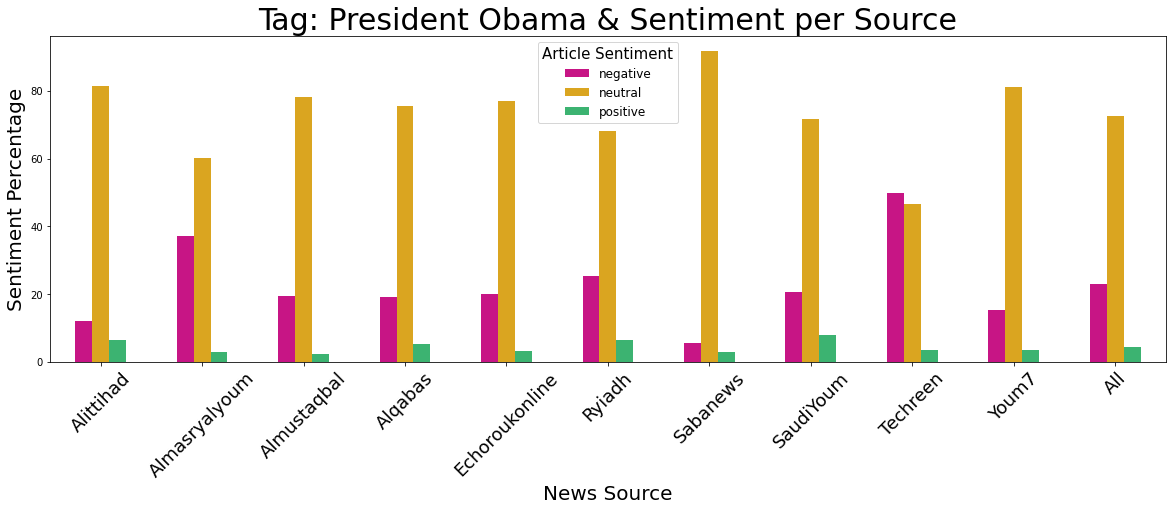

In [23]:
plt.rcParams["figure.figsize"] = (20, 6)

ax1= pres_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])
ax2= clinton_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])
ax3= bush_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])
ax4= obama_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])

ax1.set_xlabel("News Source", fontsize=20)
ax2.set_xlabel("News Source", fontsize=20)
ax3.set_xlabel("News Source", fontsize=20)
ax4.set_xlabel("News Source", fontsize=20)

ax1.set_ylabel("Sentiment Percentage", fontsize=20)
ax2.set_ylabel("Sentiment Percentage", fontsize=20)
ax3.set_ylabel("Sentiment Percentage", fontsize=20)
ax4.set_ylabel("Sentiment Percentage", fontsize=20)


xlabels = ax1.get_xticklabels() 
ax1.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax2.get_xticklabels() 
ax2.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax3.get_xticklabels() 
ax3.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax4.get_xticklabels() 
ax4.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)


ax1.set_title('Average Sentiments of All 3 President Tags', size=30)
ax1.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax2.set_title('Tag: President Clinton & Sentiment per Source', size=30)
ax2.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax3.set_title('Tag: President Bush & Sentiment per Source', size=30)
ax3.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax4.set_title('Tag: President Obama & Sentiment per Source', size=30)
ax4.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)


plt.show()


### Question 2 Statistical Tests:

Statistical Test

- H0: The US president tags and and text_label (sentiment) are independent of one another
- H1:  The US president tags and text_label (sentiment) are have a relationship

In [24]:
alpha =.05

observed = pd.crosstab(presidents.en_tags, presidents.text_label)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Reject the null hypothesis.


### Question 2  Takeaways:
Are there any sources that have change in sentiment based on president tag?

- Teshreen is more negative towards Bush than the other 2 presidents
- All sources averages are slightly more negative towards Buth
- Almustuqbal is noteably more negative towards Obama
- Most sources seem pretty consistent in sentiment towards presidents

## Ouestion 3: What is the relationship of the top 3 occuring tags (excluding president names) and article sentiment by individual news sources?

In [25]:
washington = df[(df['en_tags'] == 'Washington')]
al_q = df[(df['en_tags'] == 'Al Qaida')]
america = df[(df['en_tags'] == 'America')]

america_perc = pd.crosstab(america.source, america.text_label, margins=True)
america_perc = america_perc.apply(lambda x: x / x['All'] * 100, axis=1)
america_perc = america_perc .drop(columns=['All'])
america_perc

In [26]:
al_q.text_label.value_counts(normalize = True)

neutral     0.743580
negative    0.194843
positive    0.061578
Name: text_label, dtype: float64

In [27]:
washington.text_label.value_counts(normalize = True)

neutral     0.794790
negative    0.180783
positive    0.024428
Name: text_label, dtype: float64

In [28]:
america.text_label.value_counts(normalize = True)

neutral     0.637769
negative    0.290337
positive    0.071895
Name: text_label, dtype: float64

#### Interestingly, America has 9% more negative labels than Al Queda

In [29]:
al_q.source.groupby(al_q.text_label).value_counts() 

text_label  source        
negative    SaudiYoum         1231
            Techreen          1170
            Almustaqbal       1037
            Youm7              960
            Almasryalyoum      846
            Alqabas            767
            Ryiadh             612
            Echoroukonline     395
            Alittihad          356
            Sabanews            46
neutral     Youm7             5485
            SaudiYoum         4331
            Almustaqbal       4312
            Alqabas           2756
            Alittihad         2687
            Ryiadh            2572
            Echoroukonline    2129
            Techreen          1769
            Almasryalyoum     1195
            Sabanews          1081
positive    SaudiYoum          821
            Alittihad          333
            Ryiadh             313
            Techreen           250
            Alqabas            176
            Almustaqbal        150
            Youm7              136
            Sabanews        

In [30]:
america_perc = pd.crosstab(america.source, america.text_label, margins=True)
america_perc = america_perc.apply(lambda x: x / x['All'] * 100, axis=1)
america_perc = america_perc .drop(columns=['All'])
america_perc
#look at this in percentages

text_label,negative,neutral,positive
source,,,
Alittihad,9.749304,74.651811,15.598886
Almasryalyoum,43.293348,52.422496,4.284156
Almustaqbal,29.203540,58.407080,12.389381
Alqabas,5.357143,81.785714,12.857143
Echoroukonline,29.398324,65.270373,5.331302
Ryiadh,45.330296,44.315593,10.354111
Sabanews,2.905569,95.883777,1.210654
SaudiYoum,23.194626,63.183430,13.621944
Techreen,46.012622,44.750430,9.236948


In [31]:
alq_perc = pd.crosstab(al_q.source, al_q.text_label, margins=True)
alq_perc = alq_perc.apply(lambda x: x / x['All'] * 100, axis=1)
alq_perc = alq_perc .drop(columns=['All'])
alq_perc

#look at this in percentages

wash_perc = pd.crosstab(washington.source, washington.text_label, margins=True)
wash_perc = wash_perc.apply(lambda x: x / x['All'] * 100, axis=1)
wash_perc = wash_perc.drop(columns=['All'])
wash_perc

#look at this in percentages

text_label,negative,neutral,positive
source,,,
Alittihad,10.545024,79.591232,9.863744
Almasryalyoum,40.692641,57.479557,1.827802
Almustaqbal,18.857974,78.414257,2.727769
Alqabas,20.735334,74.506623,4.758043
Echoroukonline,15.484124,83.457468,1.058408
Ryiadh,17.500715,73.548756,8.950529
Sabanews,3.745928,88.029316,8.224756
SaudiYoum,19.285602,67.852107,12.862290
Techreen,36.688617,55.471935,7.839448


In [32]:
wash_perc = pd.crosstab(washington.source, washington.text_label, margins=True)
wash_perc = wash_perc.apply(lambda x: x / x['All'] * 100, axis=1)
wash_perc = wash_perc.drop(columns=['All'])
wash_perc

#look at this in percentages

text_label,negative,neutral,positive
source,,,
Alittihad,11.521308,83.919722,4.558969
Almasryalyoum,28.405172,70.129310,1.465517
Almustaqbal,15.405560,83.018057,1.576383
Alqabas,17.654702,79.486763,2.858535
Echoroukonline,16.086435,82.593037,1.320528
Ryiadh,8.094474,88.488879,3.416648
Sabanews,7.488767,91.962057,0.549176
SaudiYoum,17.482765,79.388368,3.128867
Techreen,47.236404,51.387347,1.376249


### Ouestion 3: Visuals

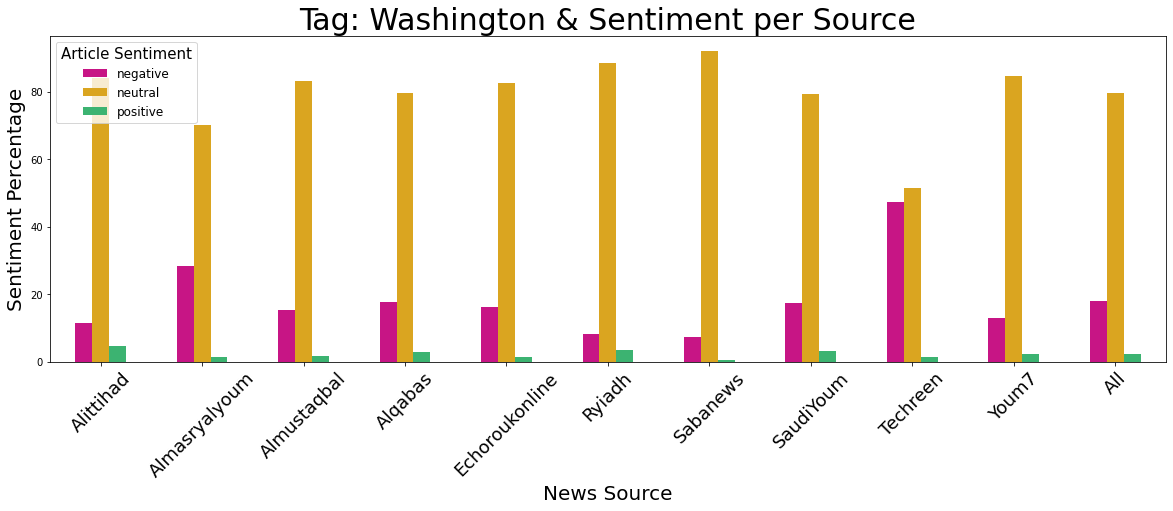

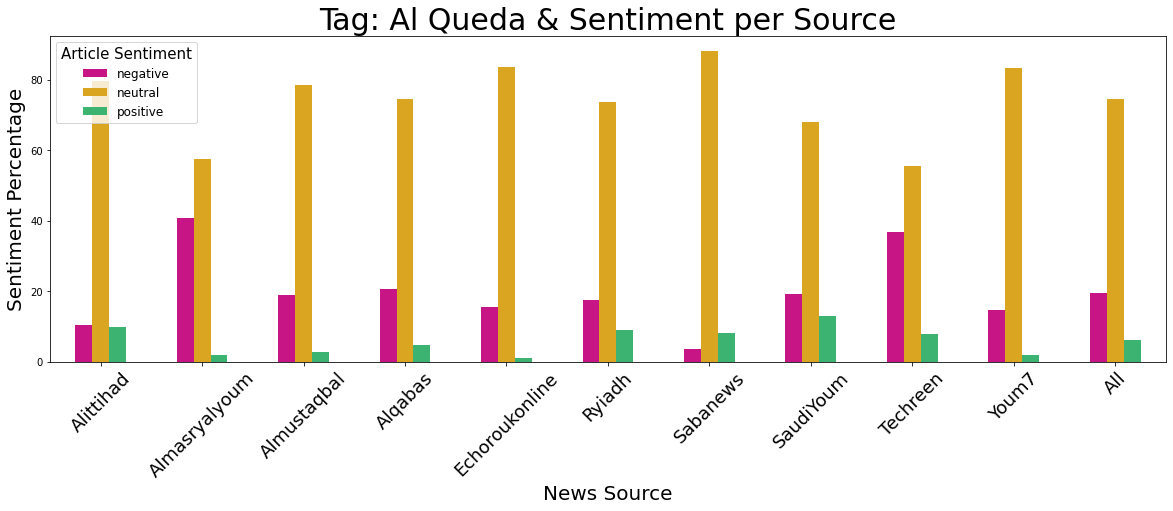

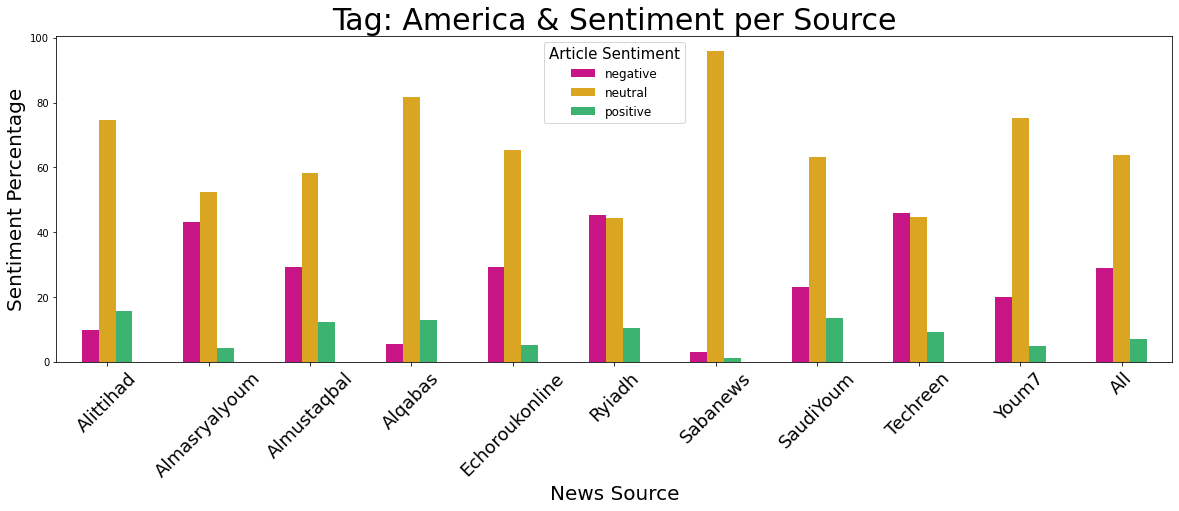

In [33]:
plt.rcParams["figure.figsize"] = (20, 6)

ax1 = wash_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen'])
ax2 = alq_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen'])
ax3 = america_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen'])

ax1.set_xlabel("News Source", fontsize=20)
ax2.set_xlabel("News Source", fontsize=20)
ax3.set_xlabel("News Source", fontsize=20)

ax1.set_ylabel("Sentiment Percentage", fontsize=20)
ax2.set_ylabel("Sentiment Percentage", fontsize=20)
ax3.set_ylabel("Sentiment Percentage", fontsize=20)

xlabels = ax1.get_xticklabels() 
ax1.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax2.get_xticklabels() 
ax2.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax3.get_xticklabels() 
ax3.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)

ax1.set_title('Tag: Washington & Sentiment per Source', size=30)
ax1.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax2.set_title('Tag: Al Queda & Sentiment per Source', size=30)
ax2.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax3.set_title('Tag: America & Sentiment per Source', size=30)
ax3.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

plt.show()

### Ouestion 3: Takeaways

What is the relationship of the top 3 occuring tags (excluding president names) and article sentiment by individual news sources?

- Interestingly, most sources have slightly more negative America articles than Al Queda (over all 10% more negative for America)
- A large margin favoring Al Queda is seen with Ryiadh and Techreen
- Techreen also has a standout high negative rate for washington
- washington compared with al queda total sentiment is very close. Other than Techreen, there isn't another source that has noteable increased negativity compared to Al Queda here. Ryiadh actually has a noteable increase in neutrals in this subset

## Question 4: What is the relationship between news sources and the target?

In [34]:
source_perc = pd.crosstab(df.source, df.text_label, margins=True)
source_perc = source_perc.apply(lambda x: x / x['All'] * 100, axis=1)
source_perc = source_perc.drop(columns=['All'])
source_perc
#view distributions of news sources w/target

text_label,negative,neutral,positive
source,,,
Alittihad,11.974978,81.566875,6.458147
Almasryalyoum,37.028026,60.125535,2.846438
Almustaqbal,19.414117,78.232984,2.352899
Alqabas,19.210552,75.635160,5.154288
Echoroukonline,20.006032,76.887504,3.106464
Ryiadh,25.256066,68.220513,6.523421
Sabanews,5.522914,91.715629,2.761457
SaudiYoum,20.478159,71.692211,7.829631
Techreen,49.888426,46.638036,3.473538


In [35]:
transcription_table=pd.DataFrame(
    {
        'source': ['Alittihad','Echoroukonline','Ryiadh','SaudiYoum','Techreen', 'Alqabas', 'Almustaqbal','Almasryalyoum', 'Youm7','Sabanews'],
        'country': ['UAE','Algeria','Saudi_Arabia','Saudi_Arabia','Syria', 'Kuwait', 'Lebanon','Egypt','Egypt','Yemen']
    }
)

mapping = transcription_table.set_index('source').to_dict()['country']

df['country'] = df['source'].apply(lambda x: mapping.get(x))
#map country to news source

country_perc = pd.crosstab(df.country, df.text_label, margins=True)
country_perc = country_perc.apply(lambda x: x / x['All'] * 100, axis=1)
country_perc = country_perc.drop(columns=['All'])
country_perc
#view distributions of news source country w/target

In [36]:
country_perc = pd.crosstab(df.country, df.text_label, margins=True)
country_perc = country_perc.apply(lambda x: x / x['All'] * 100, axis=1)
country_perc = country_perc.drop(columns=['All'])
country_perc
#view distributions of news source country w/target

text_label,negative,neutral,positive
country,,,
Algeria,20.006032,76.887504,3.106464
Egypt,21.167656,75.611941,3.220403
Kuwait,19.210552,75.635160,5.154288
Lebanon,19.414117,78.232984,2.352899
Saudi_Arabia,22.325688,70.349769,7.324544
Syria,49.888426,46.638036,3.473538
UAE,11.974978,81.566875,6.458147
Yemen,5.522914,91.715629,2.761457
All,22.906447,72.587145,4.506407


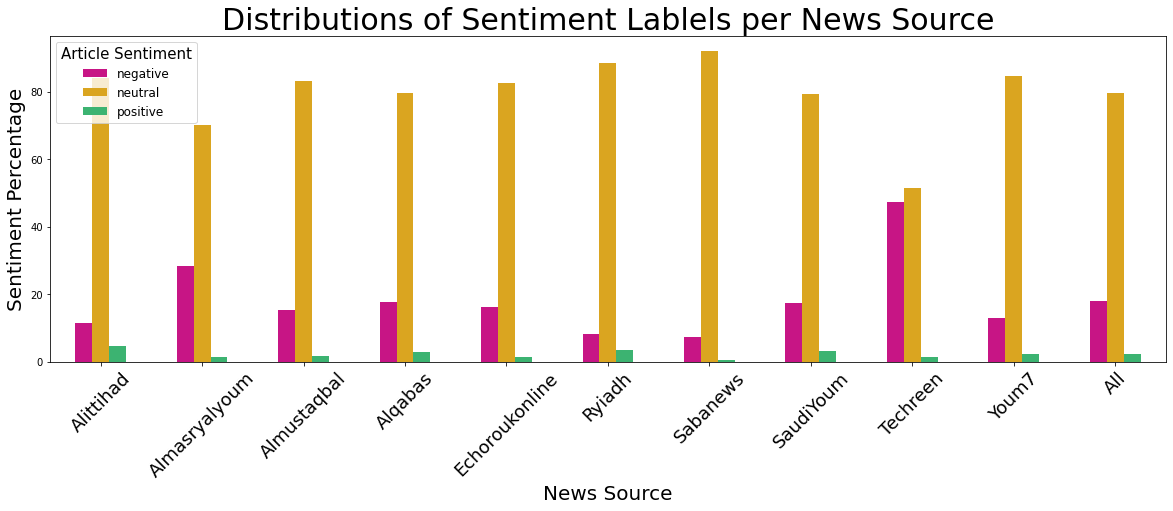

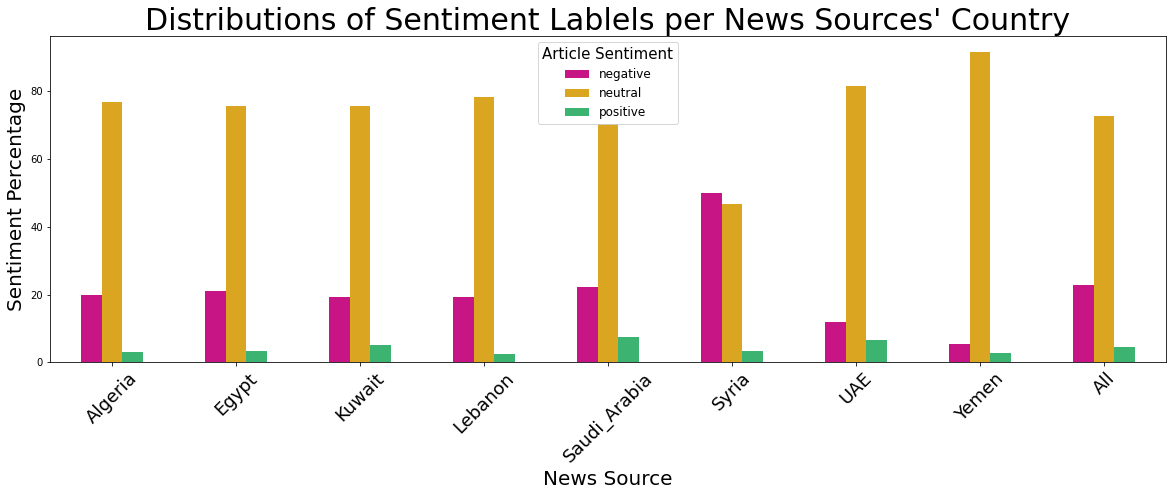

In [37]:
plt.rcParams["figure.figsize"] = (20, 6)

ax1 = wash_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen'])
ax2 = country_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen'])

ax1.set_xlabel("News Source", fontsize=20)
ax2.set_xlabel("News Source", fontsize=20)

ax1.set_ylabel("Sentiment Percentage", fontsize=20)
ax2.set_ylabel("Sentiment Percentage", fontsize=20)

xlabels = ax1.get_xticklabels() 
ax1.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax2.get_xticklabels() 
ax2.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)

ax1.set_title('Distributions of Sentiment Lablels per News Source', size=30)
ax1.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax2.set_title("Distributions of Sentiment Lablels per News Sources' Country", size=30)
ax2.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

plt.show()

### Question 4- Statistical Tests:

### Question 4- Statistical Tests:

- H0: The news source and text_label (sentiment) are independent of one another
- H1: The news source and text_label (sentiment) are have a relationship

In [38]:
alpha =.05

observed = pd.crosstab(df.source, df.text_label)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Reject the null hypothesis.


- H0: The country of publication and text_label (sentiment) are independent of one another
- H1: The country of publication and text_label (sentiment) are have a relationship

In [39]:
alpha =.05

observed = pd.crosstab(df.country, df.text_label)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Reject the null hypothesis.


### Question 4- Takeaways - 

What is the relationship between news sources and the target?

- Some individual news sources do seem to vary a bit in general sentiment trends. Noteably, the source Teshreen has a very high number of negative sentiment articles compared to the others while Saba News and Riyadh display the most overall neutrality. There are 2 news sources in Eygpt and interestingly, one (Almasryalyoum) has the second highest negativity rate while the other (Youm7) appears to be one of the more neutral leaning sources. Saudi Arabia is the other country with 2 news sources (Ryiadh & SaudiYoum)   

Question 5 - 

## CLUSTER WORK START

In [ ]:
import pandas as pd
import numpy as np
import helper
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt
import re
import datetime

from scipy import stats
from scipy.stats import pearsonr, spearmanr

from googletrans import Translator

data = pd.read_csv('daily8_5.csv')
data['dateline'] = pd.to_datetime(data.dateline)
df = data.copy()
df = df[df.text_label != 'False']
df2 = df

In [49]:
df = df2

In [51]:
df.head()

,index,id,url,headline,dateline,text,tags,source,text_label,text_score,headline_label,headline_score
1,1,ETD_ARB_0000035,http://www.alittihad.ae/details.php?id=55&y=20...,التنبؤات السنوية,2008-01-01,هذه هي حلقة التنبؤات المشتركة السنوية الرابعة ...,"['أوباما', 'كلينتون']",Alittihad,neutral,0.9615980386734009,neutral,0.974024
3,3,ETD_ARB_0000062,http://www.alittihad.ae/details.php?id=82&y=20...,48 قتيلاً وجريحاً باعتداءات متفرقة في العراق,2008-01-01,في استهداف جديد لعناصر ''''صحوة'''' العشائر ال...,['القاعدة'],Alittihad,neutral,0.8726907769838969,negative,0.701162
4,4,ETD_ARB_0000065,http://www.alittihad.ae/details.php?id=85&y=20...,النفط فوق 100 دولار·· هيلاري رئيسة لأميركا·· ا...,2008-01-01,استقبل العالم أول أيام العام الجديد ،2008 باحت...,['كلينتون'],Alittihad,neutral,0.9573821425437927,neutral,0.791736
5,5,ETD_ARB_0000066,http://www.alittihad.ae/details.php?id=86&y=20...,الصحوة تتحدى بن لادن: أفسدتم الأرض·· ونهايتكم ...,2008-01-01,أكد قياديون في ''''قوات الصحوة'''' اصرارهم على...,['القاعدة'],Alittihad,neutral,0.7232022285461426,negative,0.922155
6,6,ETD_ARB_0000067,http://www.alittihad.ae/details.php?id=87&y=20...,الأمن·· حلم العراقيين الوحيد في 2008,2008-01-01,مع بزوغ فجر أول يوم لسنة ،2008 يأمل العراقيون ...,['القاعدة'],Alittihad,positive,0.6070585250854492,positive,0.701550


In [52]:
df['dateline'] = df['dateline'].astype(str)

In [53]:
df = df[df.dateline != '1998-04-02']

In [54]:
df['dateline'] = pd.to_datetime(df['dateline'])

/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_94856/552541383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dateline'] = pd.to_datetime(df['dateline'])


In [55]:
df['dateline']

1        2008-01-01
3        2008-01-01
4        2008-01-01
5        2008-01-01
6        2008-01-01
            ...    
331864   2005-03-18
331865   2005-03-18
331866   2005-03-18
331867   2005-03-18
331869   2005-03-18
Name: dateline, Length: 237705, dtype: datetime64[ns]

In [56]:
df["quarter"] = pd.PeriodIndex(df.dateline, freq='Q')

/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_94856/1470118430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["quarter"] = pd.PeriodIndex(df.dateline, freq='Q')


In [57]:
df["quarter"]

1         2008Q1
3         2008Q1
4         2008Q1
5         2008Q1
6         2008Q1
           ...  
331864    2005Q1
331865    2005Q1
331866    2005Q1
331867    2005Q1
331869    2005Q1
Name: quarter, Length: 237705, dtype: period[Q-DEC]

In [58]:
quarter_perc = pd.crosstab(df.quarter, df.text_label, margins=True)

In [59]:
quarter_perc

text_label,negative,neutral,positive,All
quarter,,,,
2001Q1,8,3,2,13
2001Q2,67,9,1,77
2001Q3,3,0,0,3
2001Q4,176,12,6,194
2002Q1,165,16,9,190
2002Q2,207,17,5,229
2002Q3,351,532,61,944
2002Q4,275,619,54,948
2003Q1,607,1000,107,1714


In [ ]:
quarter_perc = quarter_perc.apply(lambda x: x / x['All'] * 100, axis=1)

In [23]:




quarter_perc = quarter_perc.drop(columns=['All'])
quarter_perc

text_label,False,negative,neutral,positive
quarter,,,,
1998Q2,0.000000,0.000000,100.000000,0.000000
2000Q1,100.000000,0.000000,0.000000,0.000000
2001Q1,40.909091,36.363636,13.636364,9.090909
2001Q2,50.955414,42.675159,5.732484,0.636943
2001Q3,57.142857,42.857143,0.000000,0.000000
2001Q4,52.450980,43.137255,2.941176,1.470588
2002Q1,48.648649,44.594595,4.324324,2.432432
2002Q2,45.346062,49.403341,4.057279,1.193317
2002Q3,36.473755,23.620458,35.800808,4.104980
